In [1]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

In [4]:
# Load the pre-trained Vision Encoder-Decoder model for image captioning
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Load the pre-trained feature extractor for the Vision Encoder-Decoder model
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Load the pre-trained tokenizer for the Vision Encoder-Decoder model
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Check if a CUDA device is available, otherwise default to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the chosen device (GPU or CPU)
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [5]:
# Define the maximum length of the generated captions
max_length = 16  # This is the maximum number of tokens in the generated caption

# Define the number of beams to use for beam search
num_beams = 4  # This defines the number of candidate caption sequences considered at each step

# Create a dictionary to store the generation parameters
gen_kwargs = {
    "max_length": max_length,
    "num_beams": num_beams,
}

In [21]:
import matplotlib.pyplot as plt


def predict_step(image_paths):
    """
    Predicts captions for images and displays them with the original images.

    Args:
        image_paths (list): List of paths to image files.

    Returns:
        list: List of predicted captions.
    """

    images = []
    for image_path in image_paths:
        # Open image and convert to RGB format if needed
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        # Display the original image
        plt.imshow(i_image)
        plt.axis("off")  # Hide axes for cleaner display
        plt.show()  # Display the image

        images.append(i_image)

    # Process images and obtain predicted captions
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    output_ids = model.generate(pixel_values, **gen_kwargs)
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]

    return preds

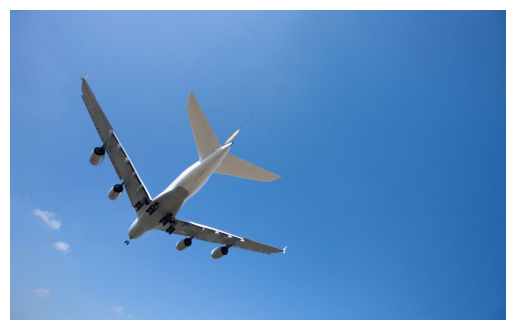

['a large jetliner flying through a blue sky']

In [24]:
predict_step(['/content/air.jpg'])